In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Files

In [2]:
data_new = pd.read_csv(r'C:\Users\jyo14\.jupyter\INNHotelsGroup_newdata.csv')
data_past = pd.read_csv(r'C:\Users\jyo14\.jupyter\INNHotelsGroup_pastdata.csv')

In [3]:
data_past.shape

(27093, 12)

In [4]:
data_new.shape

(3583, 11)

In [5]:
data_new.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
dtype: object

# Descriptive Statistics

In [6]:
data_past.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000
mean,81.605249,0.556454,101.025910,1.825822,0.778319,0.028864,2.171373
std,84.901428,0.743715,34.557289,0.512182,0.861787,0.167426,1.386023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,79.000000,2.000000,0.000000,0.000000,1.000000
50%,55.000000,0.000000,97.000000,2.000000,1.000000,0.000000,2.000000
75%,118.000000,1.000000,119.000000,2.000000,1.000000,0.000000,3.000000
max,443.000000,5.000000,540.000000,4.000000,6.000000,1.000000,17.000000


# Inference:
By looking at the 5 point summary,we can suspect outliers on the upper tail of lead time, 
average price per room and no of week nights.

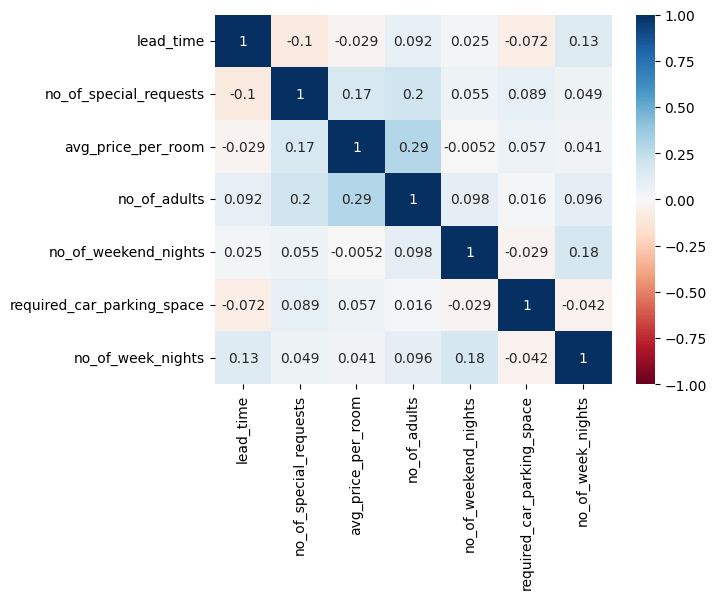

In [7]:
# Looking for Correlation plot
sns.heatmap(data_past.corr(numeric_only=True),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

# Inference:
1) There is some positive correlation between avg_price_per_room and no_of_adults.
2) There is positive correlation between no of special request and no of adults.
3) Weak positive correlation between no of week nights and weekend nights.
4) Weak positive correlation between avg_room_price and no_of_special_request.

# Data Visualisation and Data Preprocessing

In [8]:
# what % of cancelled booking were rebooked?
rebooked = data_past[data_past['booking_status']=='Canceled']['rebooked']

<Axes: ylabel='count'>

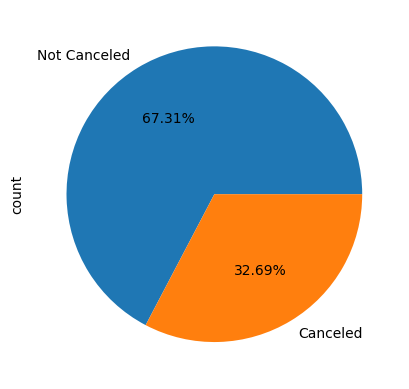

In [9]:
data_past['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')

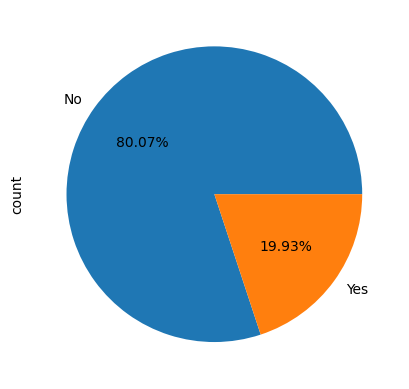

In [10]:
rebooked.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Inference
* There were 33% booking which were cancelled at the last minute.Out of those 80% of the cancelled
bookings were not rebooked.That is the main reason why the company is incurring losses.

In [11]:
# Now we do not need the rebooked column in our analysis,hence we can drop it
data_past.drop(columns=['rebooked'],inplace=True)

In [12]:
data_past

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
27088,INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled
27089,INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled
27090,INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled
27091,INNHG_128125,68,Online,1,131.40,2,0,2022-06-30,0,2,Canceled


### Past data has to be used as training set and new data as test set
### For now we will store y_test in separate variable for doing validation later on.
### We also need to combine train and test over here in order to preprocess.

In [13]:
y_test = data_new['booking_status']
data_new.drop(columns=['booking_status'],inplace=True)

In [14]:
data = pd.concat([data_past,data_new],axis=0)

In [15]:
data.shape

(30676, 11)

In [16]:
data.isnull().sum()

booking_id                       0
lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
arrival_date                     0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30676 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  30676 non-null  object 
 1   lead_time                   30676 non-null  int64  
 2   market_segment_type         30676 non-null  object 
 3   no_of_special_requests      30676 non-null  int64  
 4   avg_price_per_room          30676 non-null  float64
 5   no_of_adults                30676 non-null  int64  
 6   no_of_weekend_nights        30676 non-null  int64  
 7   arrival_date                30676 non-null  object 
 8   required_car_parking_space  30676 non-null  int64  
 9   no_of_week_nights           30676 non-null  int64  
 10  booking_status              27093 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.8+ MB


In [18]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [19]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month

In [20]:
data['arrival_weekday'] = data['arrival_date'].dt.weekday

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30676 entries, 0 to 3582
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   booking_id                  30676 non-null  object        
 1   lead_time                   30676 non-null  int64         
 2   market_segment_type         30676 non-null  object        
 3   no_of_special_requests      30676 non-null  int64         
 4   avg_price_per_room          30676 non-null  float64       
 5   no_of_adults                30676 non-null  int64         
 6   no_of_weekend_nights        30676 non-null  int64         
 7   arrival_date                30676 non-null  datetime64[ns]
 8   required_car_parking_space  30676 non-null  int64         
 9   no_of_week_nights           30676 non-null  int64         
 10  booking_status              27093 non-null  object        
 11  arrival_day                 30676 non-null  int32         
 

In [22]:
data.drop(columns=['arrival_date'],inplace=True)

In [23]:
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,INNHG_101037,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,INNHG_101038,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,0,1,NaN,29,9,3
3579,INNHG_131706,263,Online,0,100.30,2,2,0,4,NaN,29,9,3
3580,INNHG_131707,185,Online,2,116.10,2,2,0,3,NaN,29,9,3
3581,INNHG_131708,214,Online,0,120.90,2,0,0,3,NaN,29,9,3


In [24]:
data.drop(columns=['booking_id'],inplace=True)

In [25]:
data

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,258,Online,1,106.20,2,0,0,1,NaN,29,9,3
3579,263,Online,0,100.30,2,2,0,4,NaN,29,9,3
3580,185,Online,2,116.10,2,2,0,3,NaN,29,9,3
3581,214,Online,0,120.90,2,0,0,3,NaN,29,9,3


# Visualization

In [26]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [27]:
num_cols = ['lead_time','avg_price_per_room','arrival_day']
cat_cols = data.drop(columns=num_cols).columns

In [28]:
num_cols

['lead_time', 'avg_price_per_room', 'arrival_day']

In [29]:
cat_cols

Index(['market_segment_type', 'no_of_special_requests', 'no_of_adults',
       'no_of_weekend_nights', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'arrival_month',
       'arrival_weekday'],
      dtype='object')

# Univariate Analysis

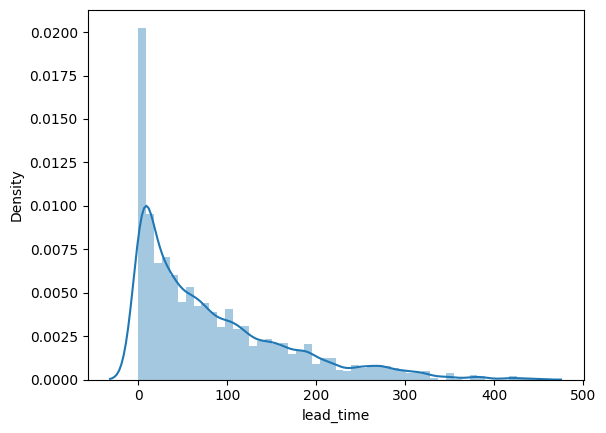

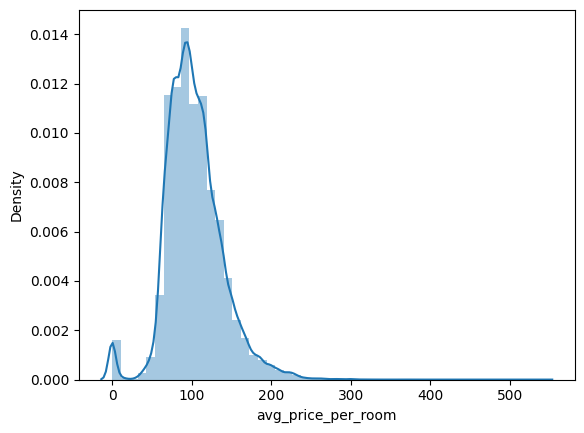

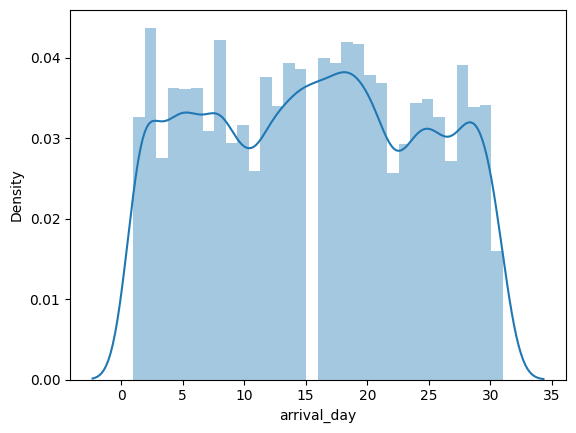

In [30]:
for i in num_cols:
    sns.distplot(data[i])
    plt.show()

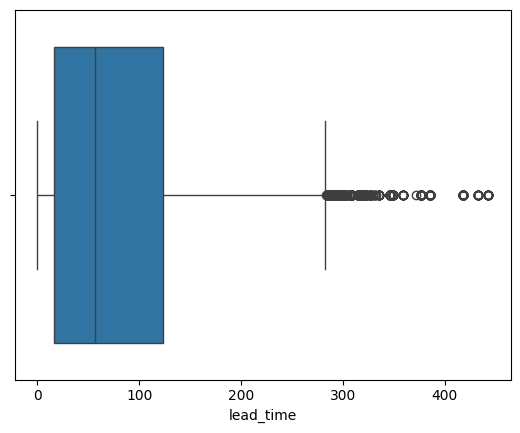

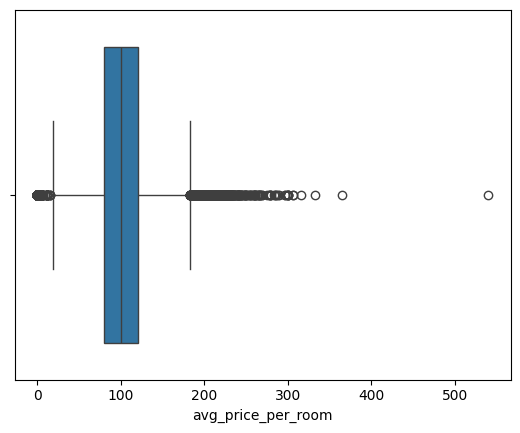

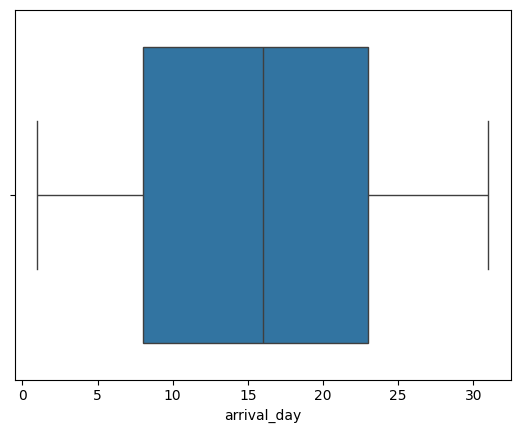

In [31]:
for i in num_cols:
    sns.boxplot(data[i],orient='h')
    plt.show()

# Inference:
1) There are extreme outliers in lead time and avg room price.

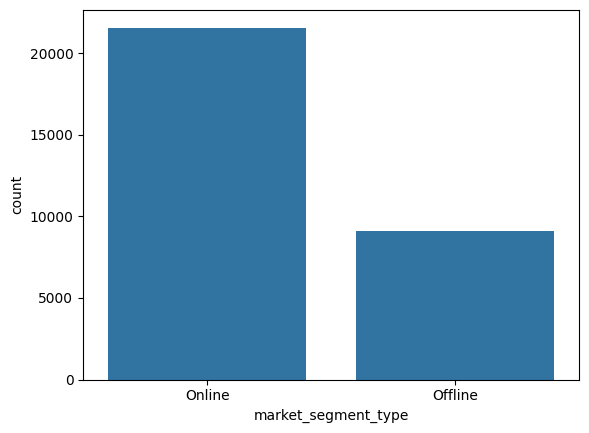

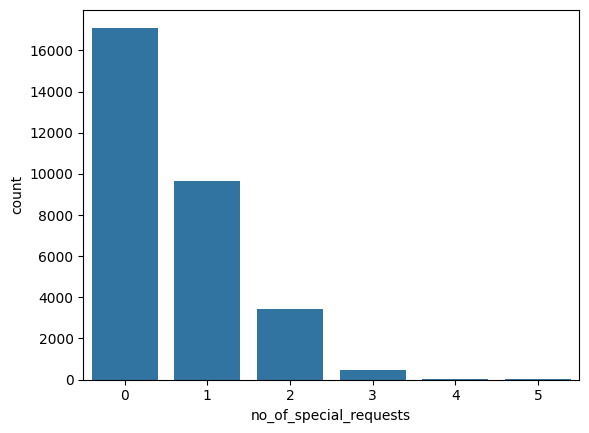

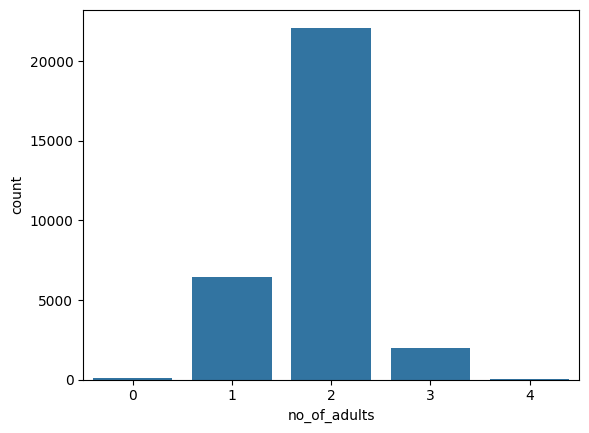

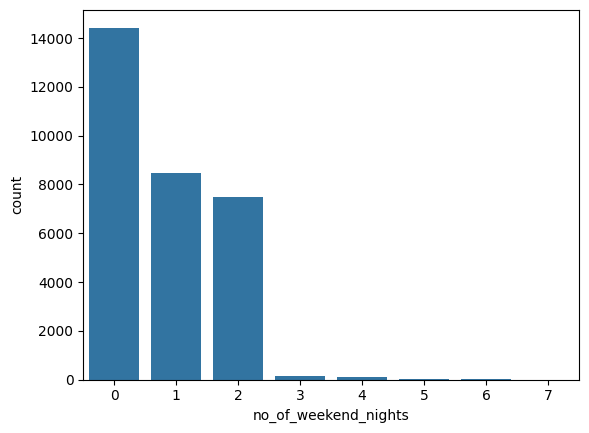

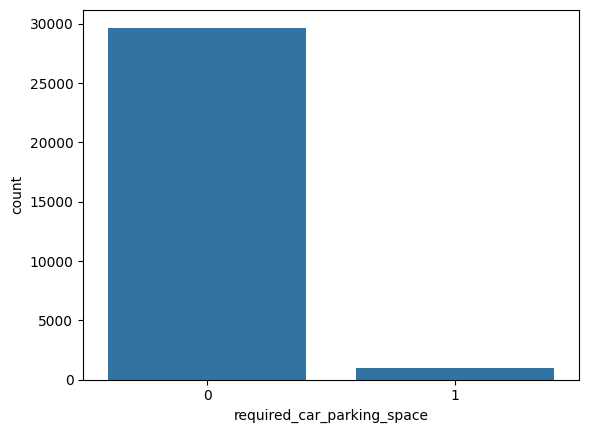

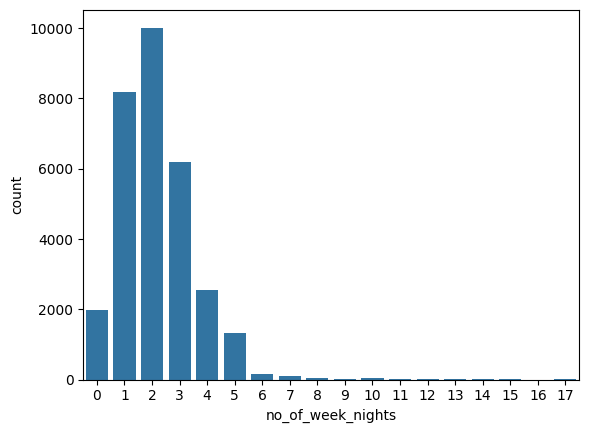

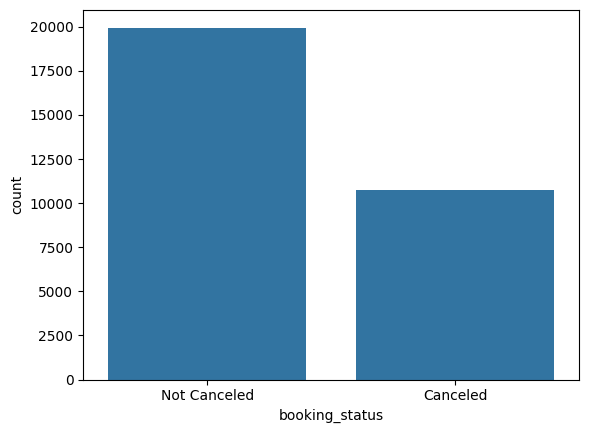

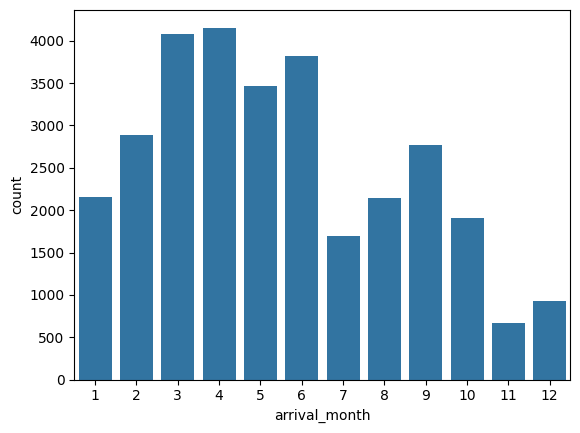

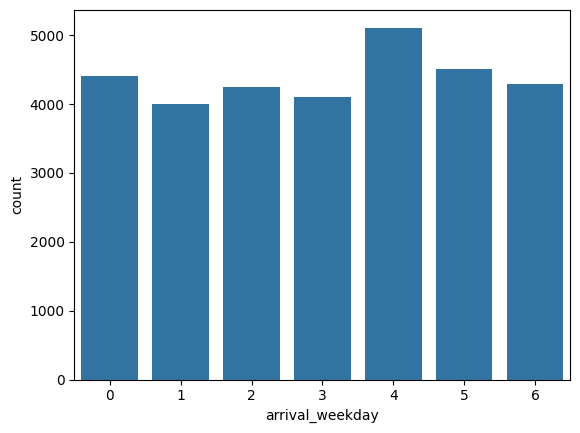

In [32]:
for i in cat_cols:
    sns.countplot(x=data[i])
    plt.show()

# Inference:
1) Most of the bookings are online.
2) Either there are no special request or 1 request in data
3) Most of the bookings have been made by couples.
4) Most of the customers have 0,1,or 2 weekend nights in their day.
5) Very few customers requested for car parking space.
6) Very few customers are having more than 5 week nights in their stay.
7) Maximum arrivals are in months of March and April and arrival day is Friday.

# Bivariate Analysis

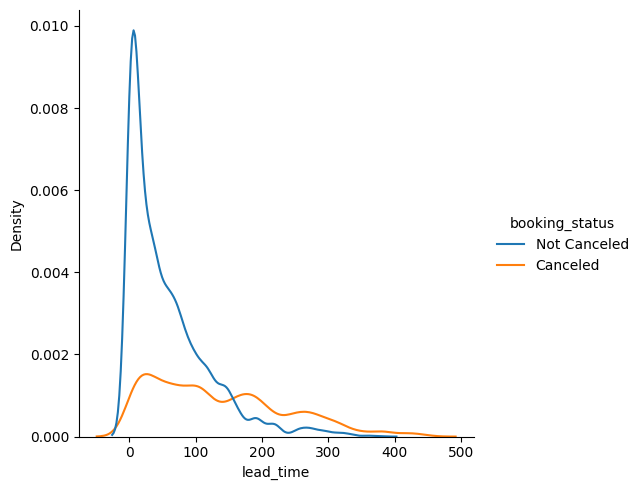

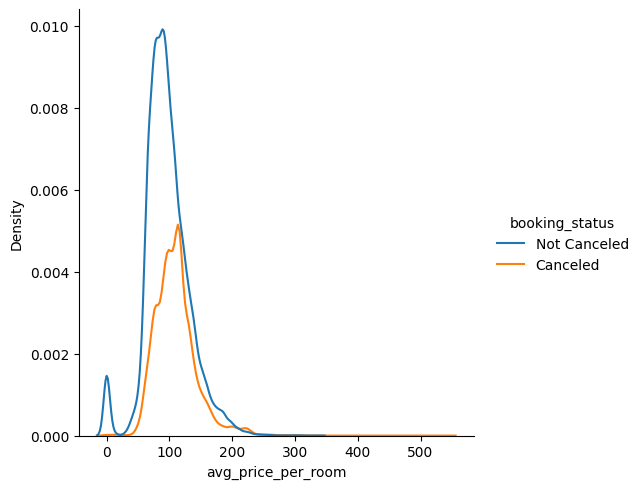

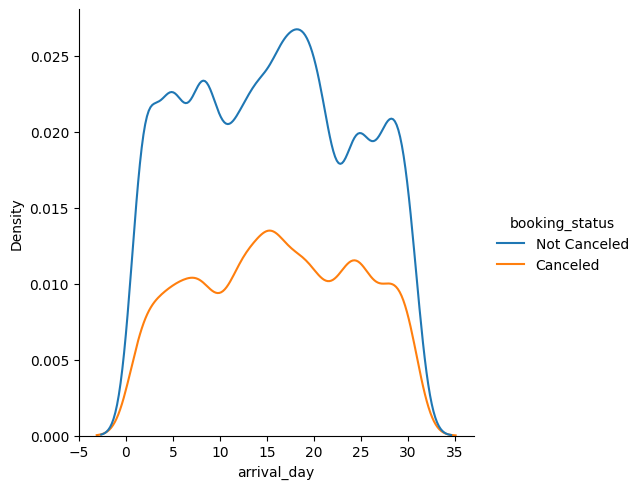

In [33]:
# Num vs Cat
for i in num_cols:
    sns.displot(data,x=i,hue=data['booking_status'],kind='kde')
    plt.show()

# Inference:
1) In lead_time and average_price for more extreme values the booking is canceled.

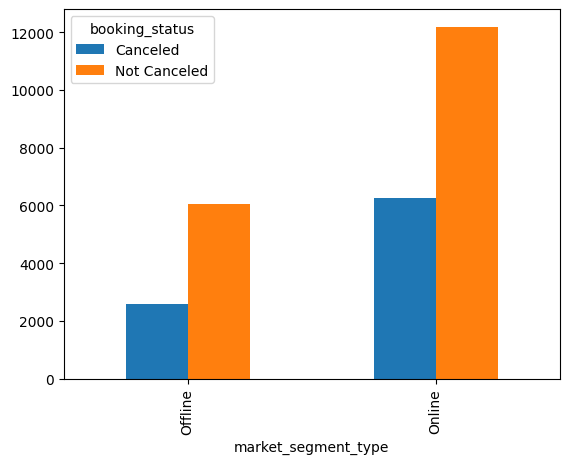

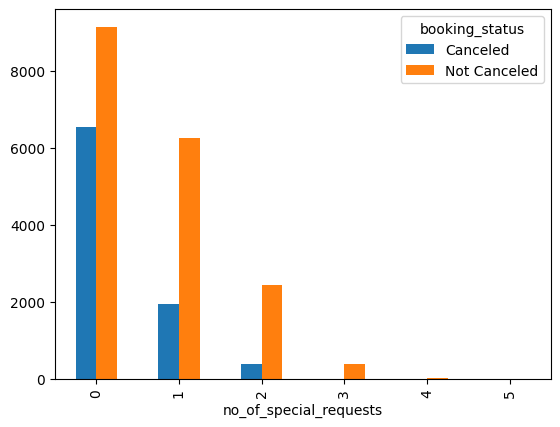

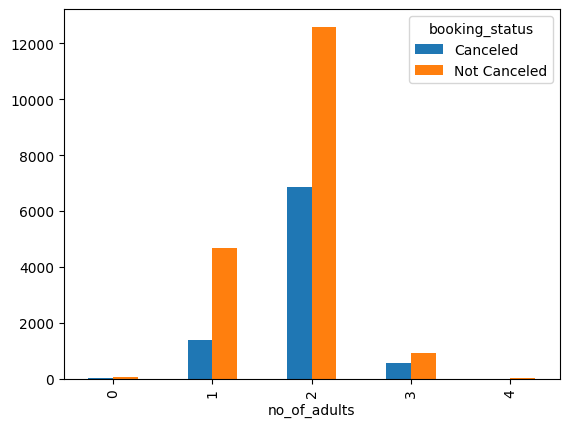

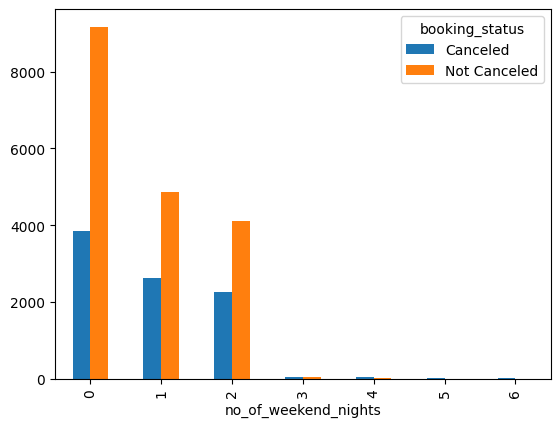

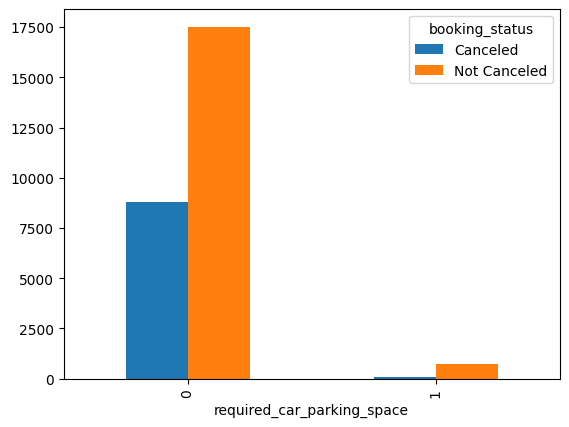

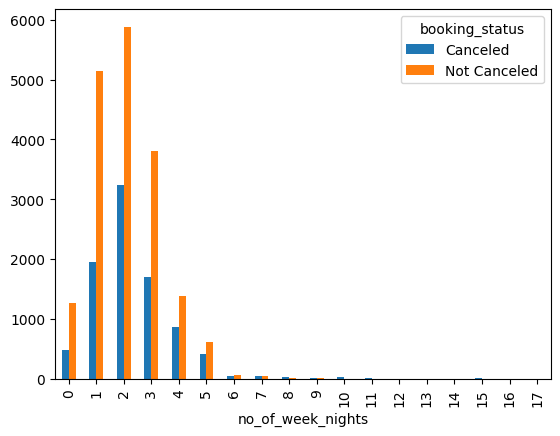

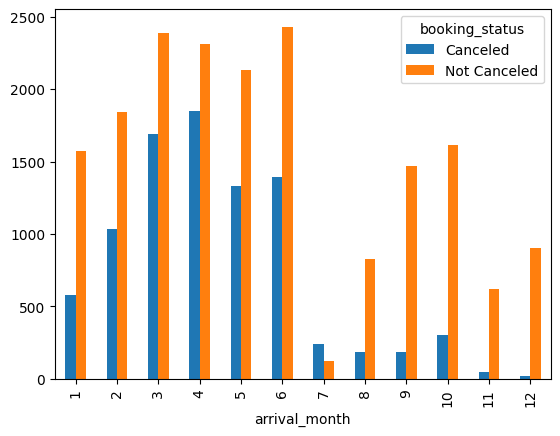

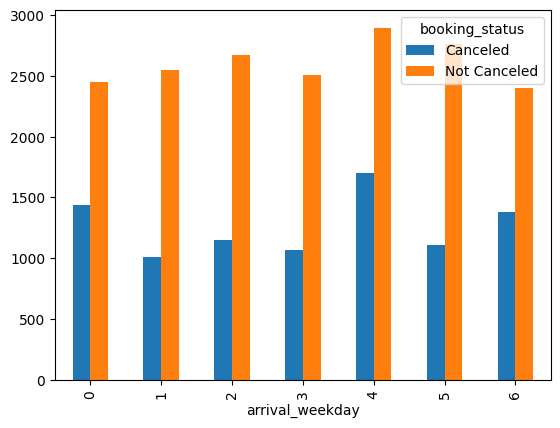

In [34]:
# Cat vs Cat
for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

# Inference:
1) Most of the non canceled bookings are through Online mode.
2) Most of the weekends and Friday bookings are not canceled.
3) Moat of the bookings are canceled in the 7th month.

# Missing Value treatment

In [35]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
arrival_day                      0
arrival_month                    0
arrival_weekday                  0
dtype: int64

In [36]:
data[data.duplicated()]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
45,12,Offline,1,85.00,1,1,0,0,Not Canceled,1,1,4
60,12,Offline,1,85.00,1,1,0,0,Not Canceled,1,1,4
63,36,Online,0,110.00,1,2,0,3,Not Canceled,1,1,4
64,231,Online,1,100.30,2,2,0,2,Canceled,1,1,4
75,61,Online,1,149.40,2,2,0,3,Not Canceled,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,263,Online,0,100.30,2,2,0,4,NaN,29,9,3
3577,134,Online,2,137.70,2,1,0,3,NaN,29,9,3
3578,258,Online,1,106.20,2,0,0,1,NaN,29,9,3
3579,263,Online,0,100.30,2,2,0,4,NaN,29,9,3


# Outlier treatment

In [37]:
# We will treat outliers from test data only.As it might lead to data leakage.

# Encoding

In [38]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4


In [39]:
# Online = 1 Offline = 0
data['market_segment_type'] = data['market_segment_type'].map({'Online':1,'Offline':0})

In [40]:
data['market_segment_type'].value_counts()

market_segment_type
1    21561
0     9115
Name: count, dtype: int64

In [41]:
# Canceled = 1 , Not Canceled = 0
data['booking_status'] = data['booking_status'].map({'Canceled':1,'Not Canceled':0})

In [42]:
data['booking_status'].value_counts()

booking_status
0.0    18236
1.0     8857
Name: count, dtype: int64

In [43]:
y_test = y_test.map({'Canceled':1,'Not Canceled':0})

In [44]:
y_test.value_counts()

booking_status
0    2383
1    1200
Name: count, dtype: int64

# Train Test Split

In [45]:
x_test = data[data['booking_status'].isnull()]

In [46]:
x_test.drop(columns=['booking_status'],inplace=True)

In [47]:
x_test.shape

(3583, 11)

In [48]:
train = data[data['booking_status'].notnull()]

In [49]:
train.shape

(27093, 12)

In [50]:
# Lets drop duplicates from train
train.drop_duplicates(inplace=True)

In [51]:
train.shape

(18655, 12)

In [52]:
# Cap the Extreme Outliers
for i in ['lead_time','avg_price_per_room']:
    q3,q1 = np.quantile(train[i],[0.75,0.25])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    train[i] = np.where(train[i]>ul,ul,train[i])
    train[i] = np.where(train[i]<ll,ll,train[i])

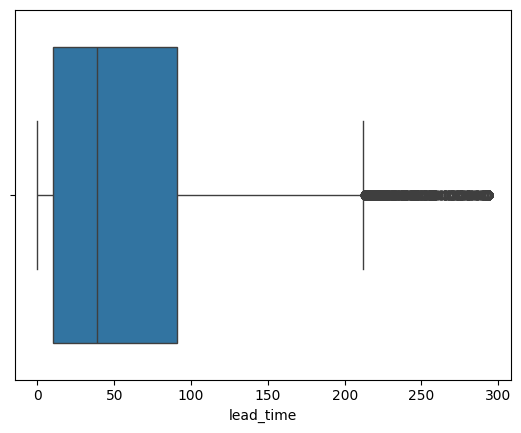

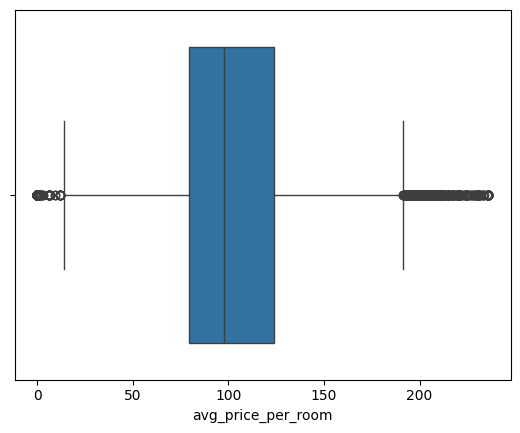

In [53]:
for i in ['lead_time','avg_price_per_room']:
    sns.boxplot(train[i],orient='h')
    plt.show()

In [54]:
x_train = train.drop(columns='booking_status')
y_train = train['booking_status']

In [55]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18655, 11) (3583, 11) (18655,) (3583,)


# Predictive Modeling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [57]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]
    print('classification_report\n',classification_report(ytest,hard))
    fpr,tpr,thres = roc_curve(ytest,soft)
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()
    inp = input('Do you want to save the model in score card? Y/N')
    if inp.lower() == 'y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model':mod,
                                 'Accuracy':acc,
                                 'Precision':pre,
                                 'Recall':rec,
                                 'F1 score':f1,
                                 'Cohen-Kappa':ck})
    else:
        return 

classification_report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.75      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.73      3583
weighted avg       0.78      0.78      0.77      3583



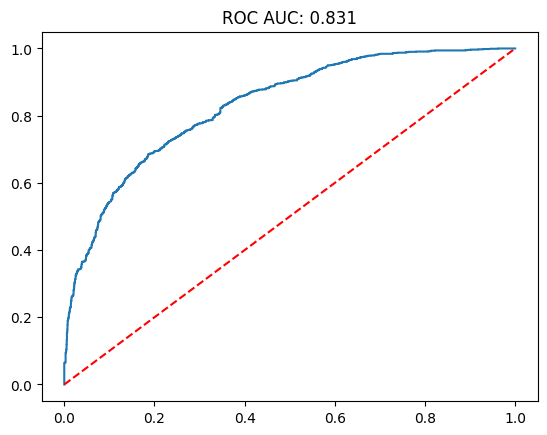

Do you want to save the model in score card? Y/Ny


In [58]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [59]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.46661


# Decision Tree

In [60]:
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth':[4,5,6,7,8]},cv=5,scoring='f1')

In [61]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8]}, scoring='f1')

In [62]:
gscv.best_score_

0.5764741707418349

In [63]:
gscv.best_params_

{'max_depth': 7}

classification_report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.78      3583
weighted avg       0.80      0.80      0.80      3583



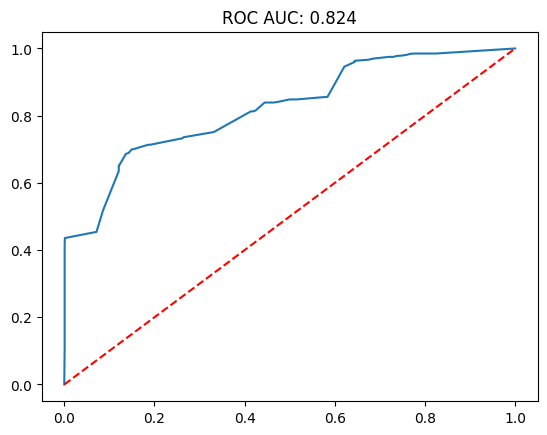

Do you want to save the model in score card? Y/Ny


In [64]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [65]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


# Random Forest

classification_report
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      2383
           1       0.86      0.66      0.75      1200

    accuracy                           0.85      3583
   macro avg       0.85      0.80      0.82      3583
weighted avg       0.85      0.85      0.84      3583



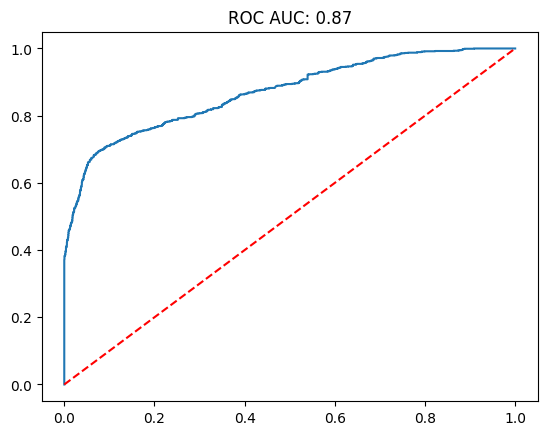

Do you want to save the model in score card? Y/Ny


In [66]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators=100),x_train,y_train,x_test,y_test)

In [67]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872


# ADA Boost

classification_report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      2383
           1       0.62      0.79      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.75      3583
weighted avg       0.79      0.77      0.77      3583



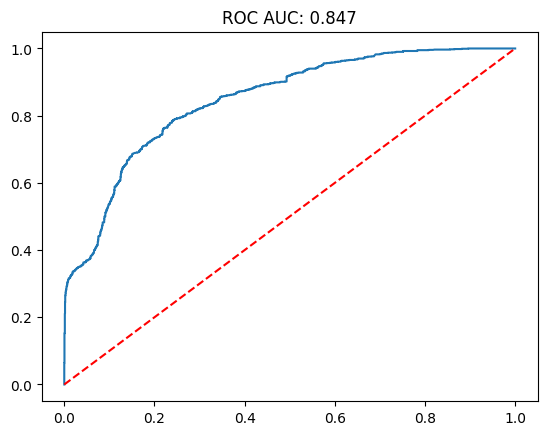

Do you want to save the model in score card? Y/Ny


In [68]:
model_validation(AdaBoostClassifier(n_estimators=120,learning_rate=0.5),x_train,y_train,x_test,y_test)

In [69]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616


# Gradient Boosting

classification_report
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      2383
           1       0.63      0.77      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.75      3583
weighted avg       0.79      0.77      0.77      3583



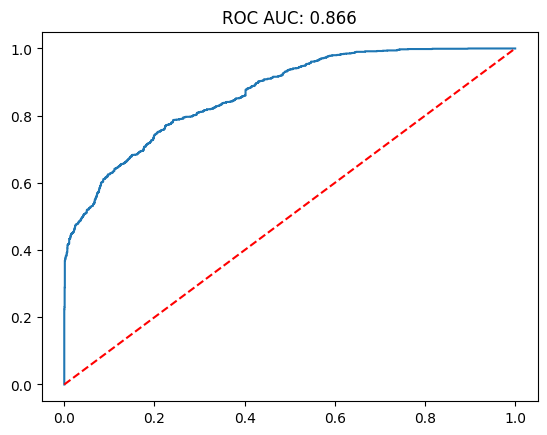

Do you want to save the model in score card? Y/Ny


In [70]:
model_validation(GradientBoostingClassifier(max_depth=6,n_estimators=150),x_train,y_train,x_test,y_test)

In [71]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.770025,0.627027,0.773333,0.692537,0.512037


classification_report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.80      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



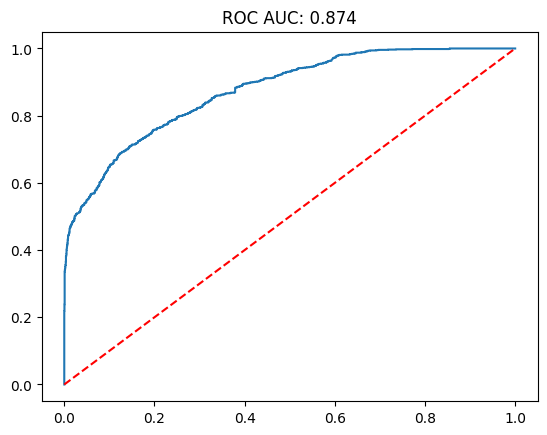

Do you want to save the model in score card? Y/Ny


In [72]:
model_validation(XGBClassifier(max_depth=4,n_estimators=120),x_train,y_train,x_test,y_test)

In [73]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.770025,0.627027,0.773333,0.692537,0.512037
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222


# Voting

In [74]:
base_learners = [('DT_4',DecisionTreeClassifier(max_depth=4)),
                 ('DT_6',DecisionTreeClassifier(max_depth=6)),
                ('RF',RandomForestClassifier(n_estimators=120,max_depth=5)),
                ('XGB',XGBClassifier(max_depth=4,n_estimators=100))]

classification_report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2383
           1       0.75      0.68      0.71      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.78      0.79      3583
weighted avg       0.81      0.82      0.82      3583



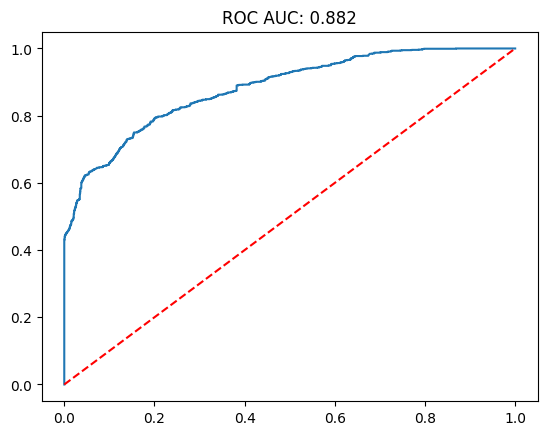

Do you want to save the model in score card? Y/Ny


In [75]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),x_train,y_train,x_test,y_test)

In [76]:
scorecard


,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.770025,0.627027,0.773333,0.692537,0.512037
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.817750,0.751610,0.680833,0.714473,0.581114


# Stacking

classification_report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2383
           1       0.85      0.56      0.67      1200

    accuracy                           0.82      3583
   macro avg       0.83      0.75      0.77      3583
weighted avg       0.82      0.82      0.81      3583



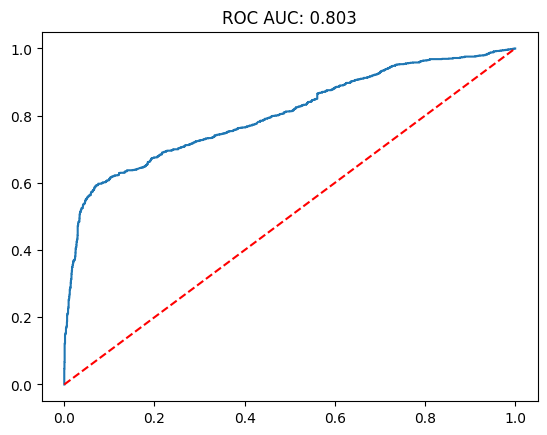

Do you want to save the model in score card? Y/Ny


In [77]:
model_validation(StackingClassifier(estimators=base_learners),x_train,y_train,x_test,y_test)

In [78]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.770025,0.627027,0.773333,0.692537,0.512037
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.817750,0.751610,0.680833,0.714473,0.581114
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.818030,0.847716,0.556667,0.672032,0.553478


In [79]:
# Lets go with GBM and tune it for final prediction

In [80]:
param = {'n_estimators':[70,100,120,150],
        'learning_rate':[1,0.5,0.1],
        'max_depth':[3,4,5,6,7,8,9,11]}

In [81]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,
                    scoring='f1',verbose=3)

In [82]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=70;, score=0.591 total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=70;, score=0.316 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=70;, score=0.176 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=70;, score=0.568 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=70;, score=0.615 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.565 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.307 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.171 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.567 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.603 total time=   0.1s
[CV 1/5] END 

[CV 4/5] END learning_rate=1, max_depth=7, n_estimators=100;, score=0.495 total time=   0.3s
[CV 5/5] END learning_rate=1, max_depth=7, n_estimators=100;, score=0.577 total time=   0.3s
[CV 1/5] END learning_rate=1, max_depth=7, n_estimators=120;, score=0.511 total time=   0.3s
[CV 2/5] END learning_rate=1, max_depth=7, n_estimators=120;, score=0.309 total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=7, n_estimators=120;, score=0.181 total time=   0.3s
[CV 4/5] END learning_rate=1, max_depth=7, n_estimators=120;, score=0.498 total time=   0.3s
[CV 5/5] END learning_rate=1, max_depth=7, n_estimators=120;, score=0.575 total time=   0.3s
[CV 1/5] END learning_rate=1, max_depth=7, n_estimators=150;, score=0.519 total time=   0.4s
[CV 2/5] END learning_rate=1, max_depth=7, n_estimators=150;, score=0.307 total time=   0.4s
[CV 3/5] END learning_rate=1, max_depth=7, n_estimators=150;, score=0.180 total time=   0.4s
[CV 4/5] END learning_rate=1, max_depth=7, n_estimators=150;, score=0.

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=150;, score=0.323 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=150;, score=0.159 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=150;, score=0.590 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=150;, score=0.623 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=70;, score=0.561 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=70;, score=0.325 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=70;, score=0.171 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=70;, score=0.568 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=70;, score=0.634 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.534 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimato

[CV 4/5] END learning_rate=0.5, max_depth=8, n_estimators=70;, score=0.515 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=8, n_estimators=70;, score=0.596 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=8, n_estimators=100;, score=0.602 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=8, n_estimators=100;, score=0.334 total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=8, n_estimators=100;, score=0.160 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=8, n_estimators=100;, score=0.514 total time=   0.3s
[CV 5/5] END learning_rate=0.5, max_depth=8, n_estimators=100;, score=0.601 total time=   0.3s
[CV 1/5] END learning_rate=0.5, max_depth=8, n_estimators=120;, score=0.590 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=8, n_estimators=120;, score=0.337 total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=8, n_estimators=120;, score=0.164 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=8, n_estim

[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=120;, score=0.682 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=120;, score=0.343 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=120;, score=0.157 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=120;, score=0.643 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=120;, score=0.715 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.669 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.342 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.156 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.640 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.705 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_est

[CV 3/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.158 total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.535 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.624 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.655 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.341 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.173 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.574 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.648 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.626 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.330 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimato

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 11],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='f1', verbose=3)

classification_report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2383
           1       0.73      0.75      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



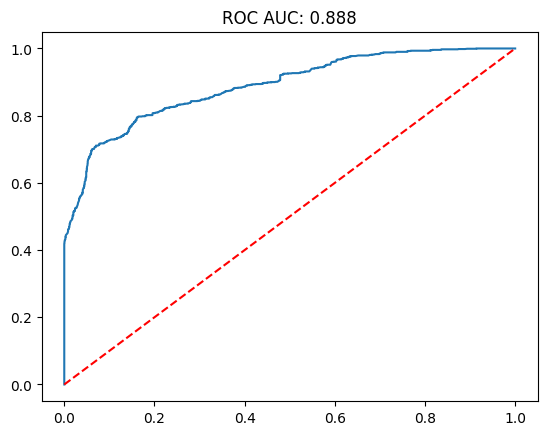

Do you want to save the model in score card? Y/Ny


In [83]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [84]:
scorecard

,Model,Accuracy,Precision,Recall,F1 score,Cohen-Kappa
0,LogisticRegression(),0.780073,0.745238,0.521667,0.613725,0.466610
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,RandomForestClassifier(max_depth=8),0.850405,0.859307,0.661667,0.747646,0.643872
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.770025,0.627027,0.773333,0.692537,0.512037
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.817750,0.751610,0.680833,0.714473,0.581114
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.818030,0.847716,0.556667,0.672032,0.553478
8,"XGBClassifier(base_score=None, booster=None, c...",0.823053,0.730832,0.746667,0.738664,0.604932


In [85]:
# this model has the best f1 score

# Final Model

In [86]:
final_model = XGBClassifier(**gscv.best_params_)

In [87]:
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Deployment

In [88]:
# Prediction

In [89]:
x_test.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [90]:
final_model.predict_proba([[10,1,0,170,2,2,1,1,12,4,4]])[:,1][0]

0.14452223

In [91]:
import pickle

In [92]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)